![ADME](https://storage.googleapis.com/polaris-public/icons/icon_fang.png) 

# `biogen/adme-fang-1` data curation


## Background

The goal of assessing ADME properties is to understand how a potential drug candidate interacts with the human body, including absorption, distribution, metabolism, and excretion. This knowledge is crucial for evaluating efficacy, safety, and clinical potential, guiding drug development for optimal therapeutic outcomes. [Fang et al. (2023)](https://doi.org/10.1021/acs.jcim.3c00160) disclosed DMPK datasets collected over 20 months across six ADME in vitro endpoints: human and rat liver microsomal stability, MDR1-MDCK efflux ratio, solubility, and human and rat plasma protein binding. The dataset contains 885 to 3087 measures for the corresponding endpoints. The compounds show the chemical diversity across all ranges of the endpoints which are microsomal stability, plasma protein binding, permeability, and solubility.

## Description of readout
- Microsomal stability (human and rat):  `LOG HLM_CLint (mL/min/kg)`, `LOG RLM_CLint (mL/min/kg)`
- Plasma protein binding (human and rat): `LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound)`, `LOG PLASMA PROTEIN BINDING (RAT) (% unbound)`
- Permeability: `LOG MDR1-MDCK ER (B-A/A-B)`
- Solubility: `LOG SOLUBILITY PH 6.8 (ug/mL)`


## Data resource
**Reference**: [Prospective Validation of Machine Learning Algorithms for Absorption, Distribution, Metabolism, and Excretion Prediction: An Industrial Perspective]( https://doi.org/10.1021/acs.jcim.3c00160)

**Github**: https://github.com/molecularinformatics/Computational-ADME

**Raw data**: https://github.com/molecularinformatics/Computational-ADME/blob/main/ADME_public_set_3521.csv 

## Dataset entry point on Polaris
The dataset is available on Polaris [polaris/adme-fang-1](https://polarishub.io/datasets/polaris/adme-fang-1). 

## Curation reproducibility
The curation process in this notebook can be reproduced by command line:

```shell
auroris curate org-Biogen/fang2023_ADME/curation_config.json org-Biogen/fang2023_ADME
```

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pathlib

import pandas as pd
import datamol as dm

root = pathlib.Path("__file__").absolute().parents[2]
# set to recipe root directory
os.chdir(root)
sys.path.insert(0, str(root))

In [2]:
org = "biogen"
data_name = "fang2023_ADME"
dirname = dm.fs.join(root, f"org-{org}", data_name)
gcp_root = f"gs://polaris-public/polaris-recipes/org-{org}/{data_name}"


# Load the data
source_data_path = f"gs://polaris-public/polaris-recipes/org-biogen/{data_name}/raw/fang2023_ADME_public_set_3521.csv"
data = pd.read_csv(source_data_path)

In [3]:
data.describe(include="all")

,Internal ID,Vendor ID,SMILES,CollectionName,LOG HLM_CLint (mL/min/kg),LOG MDR1-MDCK ER (B-A/A-B),LOG SOLUBILITY PH 6.8 (ug/mL),LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound),LOG PLASMA PROTEIN BINDING (RAT) (% unbound),LOG RLM_CLint (mL/min/kg)
count,3521,3521,3521,3521,3087.000000,2642.000000,2173.000000,194.000000,168.000000,3054.000000
unique,3521,3521,3521,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Mol1,317714313,CNc1cc(Nc2cccn(-c3ccccn3)c2=O)nn2c(C(=O)N[C@@H...,emolecules,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,1,3452,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.320019,0.397829,1.259943,0.765722,0.764177,2.256207
std,NaN,NaN,NaN,NaN,0.623952,0.688465,0.683416,0.847902,0.798988,0.750422
min,NaN,NaN,NaN,NaN,0.675687,-1.162425,-1.000000,-1.593460,-1.638272,1.027920
25%,NaN,NaN,NaN,NaN,0.675687,-0.162356,1.153510,0.168067,0.226564,1.688291
50%,NaN,NaN,NaN,NaN,1.205313,0.153291,1.542825,0.867555,0.776427,2.311068
75%,NaN,NaN,NaN,NaN,1.803115,0.905013,1.687351,1.501953,1.375962,2.835274


In [4]:
# Define data column names
data_cols = [
    "LOG HLM_CLint (mL/min/kg)",
    "LOG RLM_CLint (mL/min/kg)",
    "LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound)",
    "LOG PLASMA PROTEIN BINDING (RAT) (% unbound)",
    "LOG MDR1-MDCK ER (B-A/A-B)",
    "LOG SOLUBILITY PH 6.8 (ug/mL)",
]
mol_col = "SMILES"

### Perform data curation with `auroris.curation` module
The curation process includes:
- assign unique identifier to molecules
- detect the stereochemistry information of molecules.
- inspect the potential outliers of bioactivity values
- merge rows of replicated molecules
- detect isomers which show the activity shifts

Check out the curation module in [Auroris](https://github.com/polaris-hub/auroris). 

In [5]:
# import key curation components from auroris
from auroris.curation import Curator
from auroris.curation.actions import (
    MoleculeCuration,
    OutlierDetection,
    Deduplication,
    StereoIsomerACDetection,
    ContinuousDistributionVisualization,
)

# Define the curation workflow
curator = Curator(
    data_path=source_data_path,
    steps=[
        MoleculeCuration(input_column=mol_col, y_cols=data_cols),
        ContinuousDistributionVisualization(y_cols=data_cols),
        OutlierDetection(
            method="zscore", columns=data_cols, threshold=3, use_modified_zscore=True
        ),
        StereoIsomerACDetection(y_cols=data_cols, threshold=3),
    ],
    parallelized_kwargs={"n_jobs": -1},
)

curator.to_json(f"{dirname}/inspection_config.json")

In [6]:
# Run the curation step defined as above
data_inspection, report = curator(data)

2024-07-30 12:56:23.139 | INFO     | auroris.curation._curator:transform:106 - Performing step: mol_curation
2024-07-30 12:56:51.292 | INFO     | auroris.curation._curator:transform:106 - Performing step: distribution
2024-07-30 12:56:51.569 | INFO     | auroris.curation._curator:transform:106 - Performing step: outlier_detection
2024-07-30 12:56:51.869 | INFO     | auroris.curation._curator:transform:106 - Performing step: ac_stereoisomer


In [7]:
#  get the curation logger
from auroris.report.broadcaster import LoggerBroadcaster

broadcaster = LoggerBroadcaster(report)
broadcaster.broadcast()

===== Curation Report =====
Time: 2024-07-30 12:56:23
Version: 0.1.4.dev10+g6715566
===== mol_curation =====
[LOG]: New column added: MOL_smiles
[LOG]: New column added: MOL_molhash_id
[LOG]: New column added: MOL_molhash_id_no_stereo
[LOG]: New column added: MOL_num_stereoisomers
[LOG]: New column added: MOL_num_undefined_stereoisomers
[LOG]: New column added: MOL_num_defined_stereo_center
[LOG]: New column added: MOL_num_undefined_stereo_center
[LOG]: New column added: MOL_num_stereo_center
[LOG]: New column added: MOL_undefined_E_D
[LOG]: New column added: MOL_undefined_E/Z
[LOG]: Default `ecfp` fingerprint is used to visualize the chemical space.
[LOG]: Molecules with undefined stereocenter detected: 186.
[IMG]: Dimensions 2400 x 1800
[IMG]: Dimensions 1200 x 2400
===== distribution =====
[IMG]: Dimensions 1200 x 600
[IMG]: Dimensions 1200 x 600
[IMG]: Dimensions 1200 x 600
[IMG]: Dimensions 1200 x 600
[IMG]: Dimensions 1200 x 600
[IMG]: Dimensions 1200 x 600
===== outlier_detectio

In [16]:
# Generate an HTML report with embedded visualizations showcasing the data analysis.
from utils.auroris_utils import HTMLBroadcaster

# export report to local directory
broadcaster = HTMLBroadcaster(report, f"{dirname}/inspection_report")
report_path = broadcaster.broadcast()

In [17]:
# check the curated data
data_inspection.describe(include="all")

,Internal ID,Vendor ID,SMILES,CollectionName,LOG HLM_CLint (mL/min/kg),LOG MDR1-MDCK ER (B-A/A-B),LOG SOLUBILITY PH 6.8 (ug/mL),LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound),LOG PLASMA PROTEIN BINDING (RAT) (% unbound),LOG RLM_CLint (mL/min/kg),...,OUTLIER_LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound),OUTLIER_LOG PLASMA PROTEIN BINDING (RAT) (% unbound),OUTLIER_LOG MDR1-MDCK ER (B-A/A-B),OUTLIER_LOG SOLUBILITY PH 6.8 (ug/mL),AC_LOG HLM_CLint (mL/min/kg),AC_LOG RLM_CLint (mL/min/kg),AC_LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound),AC_LOG PLASMA PROTEIN BINDING (RAT) (% unbound),AC_LOG MDR1-MDCK ER (B-A/A-B),AC_LOG SOLUBILITY PH 6.8 (ug/mL)
count,3521,3521,3521,3521,3087.000000,2642.000000,2173.000000,194.000000,168.000000,3054.000000,...,3521,3521,3521,3521,3521,3521,3521,3521,3521,3521
unique,3521,3521,3521,5,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,2,2,1,1,1,1,1,1
top,Mol1,317714313,CNc1cc(Nc2cccn(-c3ccccn3)c2=O)nn2c(C(=O)N[C@@H...,emolecules,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,1,1,1,3452,NaN,NaN,NaN,NaN,NaN,NaN,...,3521,3520,3520,3501,3521,3521,3521,3521,3521,3521
mean,NaN,NaN,NaN,NaN,1.320019,0.397829,1.259943,0.765722,0.764177,2.256207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.623952,0.688465,0.683416,0.847902,0.798988,0.750422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.675687,-1.162425,-1.000000,-1.593460,-1.638272,1.027920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.675687,-0.162356,1.153510,0.168067,0.226564,1.688291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.205313,0.153291,1.542825,0.867555,0.776427,2.311068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.803115,0.905013,1.687351,1.501953,1.375962,2.835274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Signals or outliers
This process utilized `zscore` as the default method, but one can adjust the outlier detection method by defining parameters within the `method`. \
For more information and details on this, please refer to `auroris.curation.actions.OutlierDetection`.

During the curation process, several potential outliers were flagged across multiple endpoints. These outliers have been marked and included in the curated output. 


Below is the probability plot of data `LOG_HLM_CLint__mL_min_kg` which is also avaiable in the `Outlier detection` section of the curation report.  

![LOG_HLM_CLint](inspection_report/images/Outlier_detection_-_LOG_HLM_CLint__mL_min_kg_.png)

It's worth noting that the flagged outliers (highlighted in red), which are located at the extremes of the data distributions, are still in the value range of readout `LOG_HLM_CLint__mL_min_kg` measurement and are likely to be false positive outliers. Therefore, they should be examined closely.

Readouts `LOG PLASMA PROTEIN BINDING (RAT) (% unbound)` , `LOG MDR1-MDCK ER (B-A/A-B)` and `LOG SOLUBILITY PH 6.8 (ug/mL)` fall into the similar scenario. 

## Chemical space coverage of the dataset

![chemical space](inspection_report/images/Distribution_in_Chemical_Space_-_ECFP.png)

The above plots show the coverage in the chemical space of the molecules in dataset with respect of six endpoints.

### Examples of molecule with incomplete stereochemical information

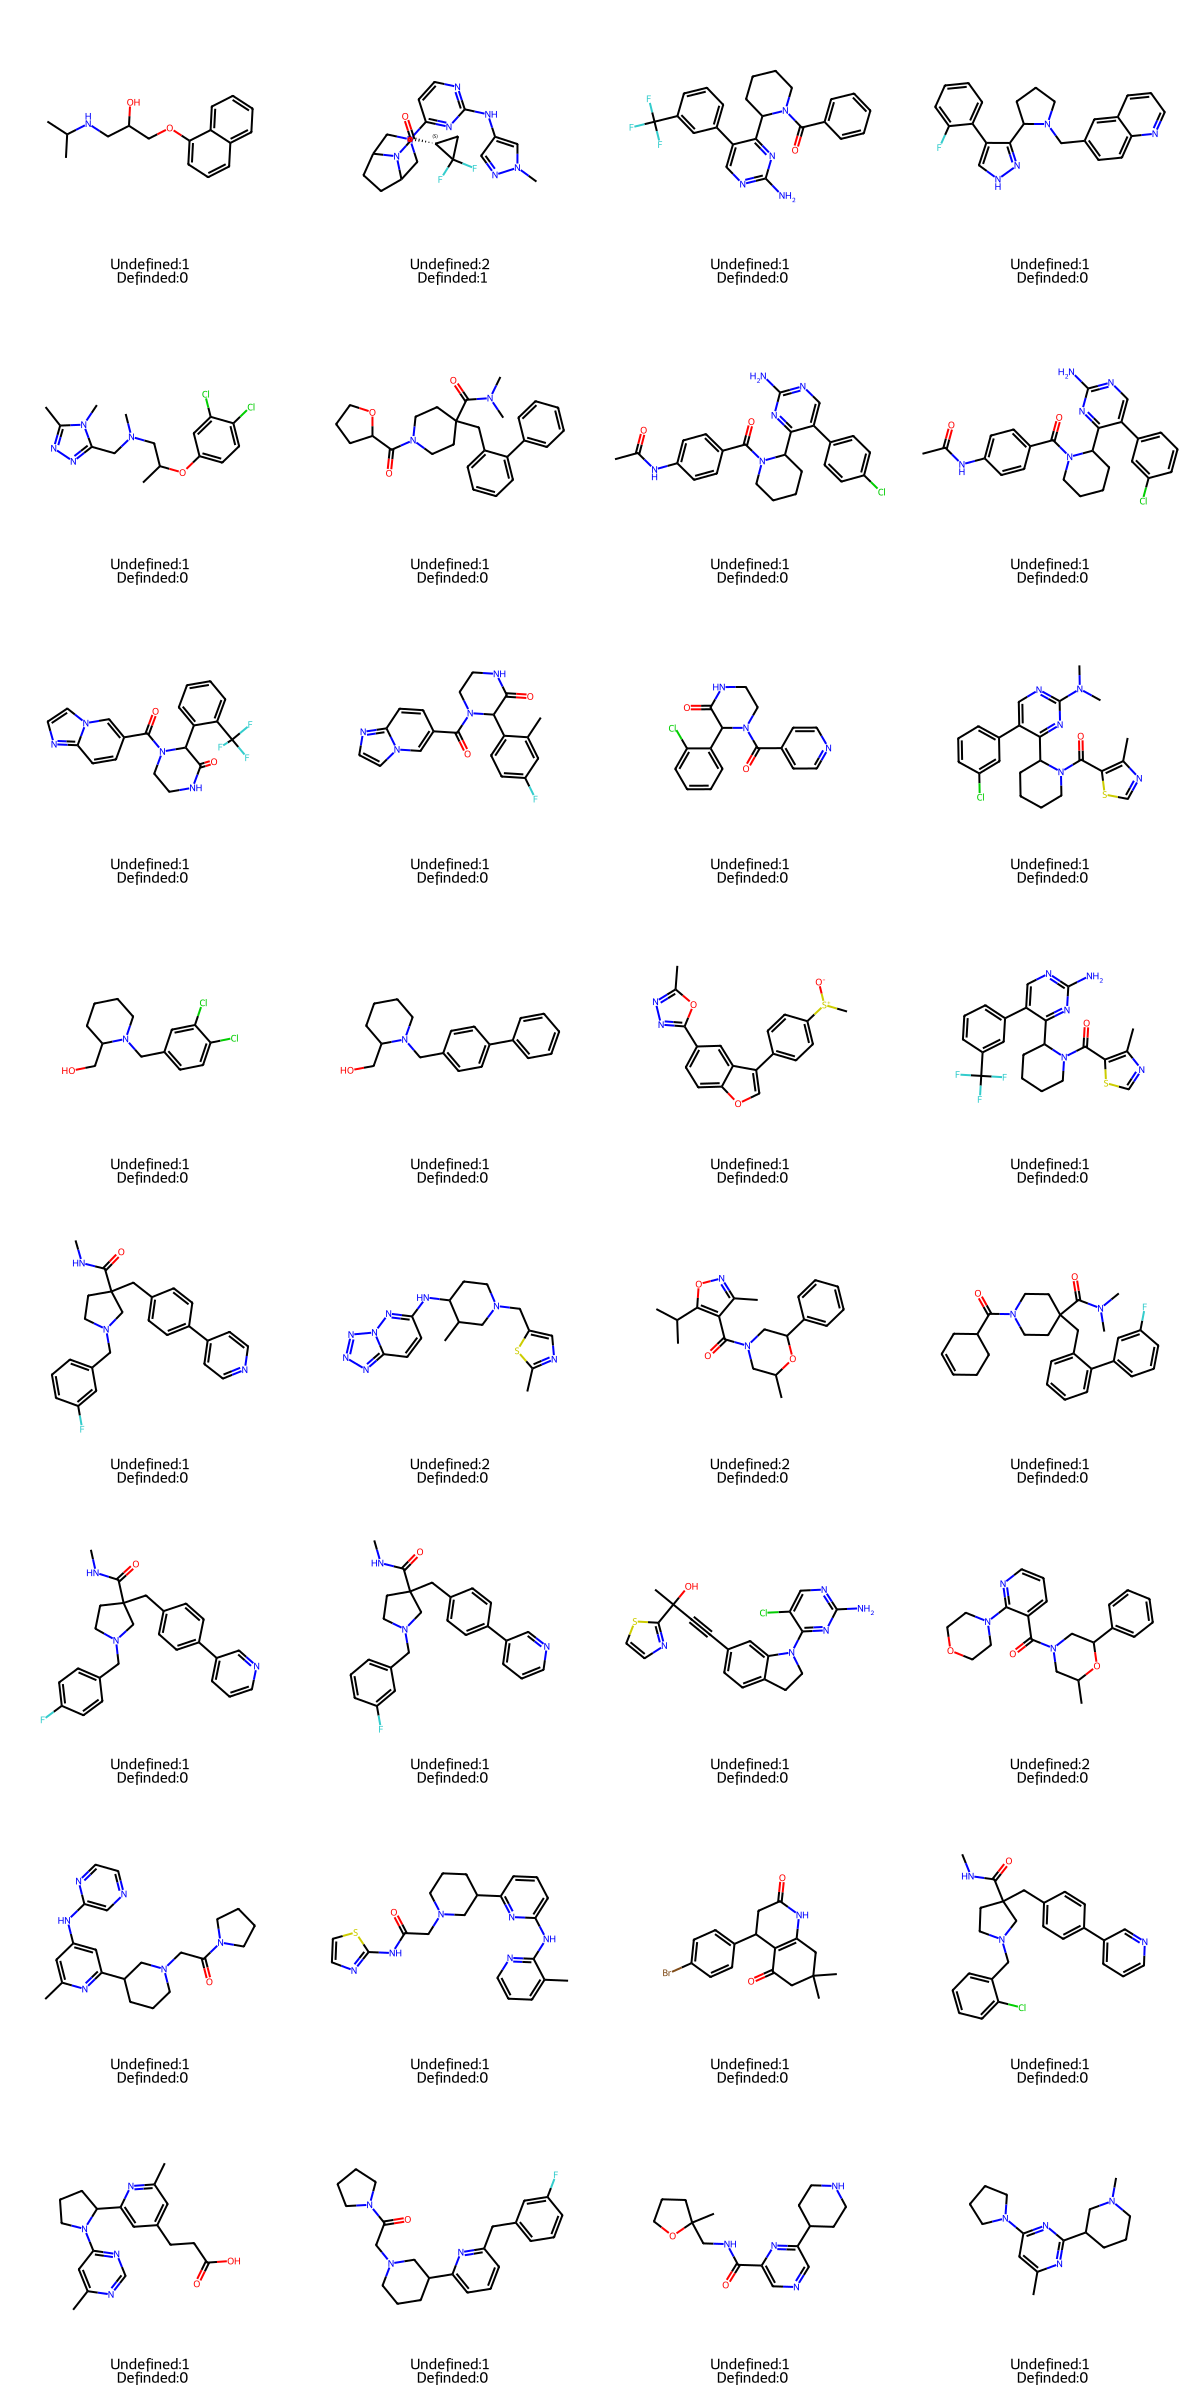

There is no activity shifts among the sterero isomers. Therefore, it's not necessary to remove the molecules with undefined stereo centers from the dataset. 

## Rerun data curation and export curated data for downstream tasks

In [18]:
# Define the final curation workflow
curator = Curator(
    source_data=source_data_path,
    steps=[
        MoleculeCuration(input_column=mol_col, y_cols=data_cols),
        ContinuousDistributionVisualization(y_cols=data_cols),
        Deduplication(
            deduplicate_on=mol_col, y_cols=data_cols
        ),  # remove the replicated molecules
        OutlierDetection(
            method="zscore", columns=data_cols, threshold=3, use_modified_zscore=True
        ),
        StereoIsomerACDetection(y_cols=data_cols, threshold=3),
    ],
    parallelized_kwargs={"n_jobs": -1},
)

In [19]:
# The final curation configuration is exported for reproducibility
path = f"{gcp_root}/data/curation/curation_config.json"
curator.to_json(path)

In [20]:
# Run the curation step defined as above
data_curated, report = curator(data)

2024-07-30 12:58:47.673 | INFO     | auroris.curation._curator:transform:106 - Performing step: mol_curation
2024-07-30 12:59:00.904 | INFO     | auroris.curation._curator:transform:106 - Performing step: distribution
2024-07-30 12:59:01.205 | INFO     | auroris.curation._curator:transform:106 - Performing step: deduplicate
2024-07-30 12:59:03.244 | INFO     | auroris.curation._curator:transform:106 - Performing step: outlier_detection
2024-07-30 12:59:03.532 | INFO     | auroris.curation._curator:transform:106 - Performing step: ac_stereoisomer


In [21]:
broadcaster = LoggerBroadcaster(report)
broadcaster.broadcast()

===== Curation Report =====
Time: 2024-07-30 12:58:47
Version: 0.1.4.dev10+g6715566
===== mol_curation =====
[LOG]: New column added: MOL_smiles
[LOG]: New column added: MOL_molhash_id
[LOG]: New column added: MOL_molhash_id_no_stereo
[LOG]: New column added: MOL_num_stereoisomers
[LOG]: New column added: MOL_num_undefined_stereoisomers
[LOG]: New column added: MOL_num_defined_stereo_center
[LOG]: New column added: MOL_num_undefined_stereo_center
[LOG]: New column added: MOL_num_stereo_center
[LOG]: New column added: MOL_undefined_E_D
[LOG]: New column added: MOL_undefined_E/Z
[LOG]: Default `ecfp` fingerprint is used to visualize the chemical space.
[LOG]: Molecules with undefined stereocenter detected: 186.
[IMG]: Dimensions 2400 x 1800
[IMG]: Dimensions 1200 x 2400
===== distribution =====
[IMG]: Dimensions 1200 x 600
[IMG]: Dimensions 1200 x 600
[IMG]: Dimensions 1200 x 600
[IMG]: Dimensions 1200 x 600
[IMG]: Dimensions 1200 x 600
[IMG]: Dimensions 1200 x 600
===== deduplicate ====

In [22]:
# Export report to polaris public directory on GCP
# The report is ready to reviewed in the HTML file.
broadcaster = HTMLBroadcaster(
    report, f"{gcp_root}/data/curation/report", embed_images=True
)
broadcaster.broadcast()

'gs://polaris-public/polaris-recipes/org-biogen/fang2023_ADME/data/curation/report/index.html'

## Export the final curated data

In [23]:
fout = f"{gcp_root}/data/curation/{data_name}_curated.csv"
data_curated.reset_index(drop=True).to_csv(fout, index=False)

## Disclaimers

<div style="background-color: lightyellow; padding: 10px; border: 1px solid black;">
    <span>Here are some additional details that may be of use when deciding whether or not to use these datasets.</span><br /><br />
    <!-- <strong><span style="color: red;">Disclaimer:</span></strong>  -->
     <strong>Some advantages include: </strong>
        <ul>
        <li>The assays were carried out by one group under a consistent set of conditions.</li>
        <li>Dataset contains only a small number of molecules with unspecified stereocenters.</li>
        <li>There are no duplicated structures in the dataset.</li>
        <li>The data is based on a well-defined ADME endpoints.</li>
        </ul>
     <strong>Some limitations to consider: </strong>
        <ul>
        <li>The size of the PPB datasets are small, making it challenging to determine a statistically significant difference between methods on these sets.</li>
        </ul>
        

</div>